# __Python and Datascience Workshop__
Author: Mohammad Akradi <sup>1</sup> <br>
<sup>1</sup> Institute of Medical Science and Technology, Shahid Beheshti University, Tehran, Iran

## __Session 3__
In this session, we will learn how to visualize our data. Data visualization is an interdisciplinary field that deals with the graphic representation of data. It is a particularly efficient way of communicating when the data is numerous as for example a time series.

---
## 1. Matplotlib
[Reference](https://matplotlib.org/)

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

* Installation

```python
!pip install matplotlib
```

as our first example, we will represent `sepal` featrures from `iris` dataset.

* Example #1:

```python
import matplotlib.pyplot as plt
import pandas as pd

iris = pd.read_csv("Materials/iris.csv")

plt.scatter("sepal_width", "sepal_length", data=iris)
```

pandas dataframes have plot attribute, in the next example, we will learn another way to plot a dataframe:

* Example #2:

```python
# plot all numerical features
iris.plot()

# set x-axis 
iris.plot("species")

# select arbitrary features to plot
iris[["petal_length", "petal_width", "species"]].plot("species")
```

now, imagine we want to represent a scatterplot of `sepal_length` vs `sepal_width`, we need to show this scatter plot colored by `species`. there is several ways to do this. let's see below example:

* Example #3:

```python
colors = {'setosa':'red', 'versicolor':'green', 'virginica':'blue'}

iris.plot.scatter("sepal_width", "sepal_length", c = iris["species"].map(colors))

# for extra options to modify, we need to use matplotlib instead of pandas:
colors = {'setosa':'red', 'versicolor':'green', 'virginica':'blue'}

plt.scatter(iris["sepal_width"], iris["sepal_length"], c = iris["species"].map(colors))
plt.show()

# for even more midifications, we can use groupby function:
groups = iris.groupby("species")

fig, ax = plt.subplots()

for name, group in groups:
    ax.scatter(group["sepal_length"], group["sepal_width"], label = name)

ax.legend()
plt.show()
```

Also, we can use `seaborn` module for visualization:

* Example #4:

```python
import seaborn as sns

sns.scatterplot("petal_width", "petal_length", data=iris, hue="species")
plt.show()
```

we can change our plot's style, in the following example, we will use `ggplot` style for the rest of our plots:

* Example #5:

```python
from matplotlib import style

style.use('ggplot')

iris["petal_length"].plot()
plt.show()
```

we can set or change y-axis and x-axis labels or title and so on:

* Example #6:

```python
plt.scatter('sepal_length', 'sepal_width', data = iris)
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

# Add Title
plt.scatter('sepal_length', 'sepal_width', data = iris, alpha = 0.5)
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.title("iris sepal scatter plot")
plt.show()

# Add legend
plt.scatter('sepal_length', 'sepal_width', data = iris, alpha = 0.5, label = 'sepal')
plt.scatter('petal_length', 'petal_width', data = iris, alpha = 0.5, label = 'petal')
plt.xlabel("length")
plt.ylabel("width")
plt.title("Title")
plt.legend(loc = 'upper left')
plt.show()
```

sometimes, we need to subplot but with shared axis, in this case x-axis:

* Example #7:

```python
ax1 = plt.subplot2grid((10, 1), (0, 0), rowspan=5, colspan=1) ## 10 rows and 1 column
ax2 = plt.subplot2grid((10, 1), (5, 0), rowspan=5, colspan=1) ## sharing axes

ax1.scatter('sepal_length', 'sepal_width', data = iris, alpha = 0.5, label = 'sepal', c = 'blue')
ax2.scatter('petal_length', 'petal_width', data = iris, alpha = 0.5, label = 'petal')

ax2.set_xlabel("Length")

ax1.set_ylabel("Width")

ax2.set_ylabel("Width")

plt.show()
```

if you want to share an axis for two subplots, you should use `sharex` or `sharey` arguman. then if you change x or y-axis for one subplot, it will change automatically for the other one.

* Example #8:

```python
ax1 = plt.subplot2grid((10, 1), (0, 0), rowspan=5, colspan=1) ## 10 rows and 1 column
ax2 = plt.subplot2grid((10, 1), (5, 0), rowspan=5, colspan=1, sharex=ax1) ## sharing axes

ax1.scatter('sepal_length', 'sepal_width', data = iris, alpha = 0.5, label = 'sepal', c = 'blue')
ax2.scatter('petal_length', 'petal_width', data = iris, alpha = 0.5, label = 'petal')

ax2.set_xlabel("Length")

ax1.set_ylabel("Width")

ax2.set_ylabel("Width")

plt.show()
```

---
# 2. Simple Statistics in Python
in this workshop, as an example, we will use linear regression. Linear regression is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods. One of its main advantages is the ease of interpreting results.<br>
`Simple` linear regression is the simplest case of linear regression with a single independent variable, $\text {x} = x.$ <br> The following figure illustrates simple linear regression:<br>

![](Materials/fig-lin-reg.webp)

`Multiple` linear regression is a case of linear regression with two or more independent variables.

we need to install scikit-learn package:

* installation:

```python
!pip install scikit-learn
```

now, we will go through first example step-by-step

* step 1: importing packages and data

```python
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = pd.read_csv("Materials/iris.csv")
```

* step 2: define features (x) and target (y)

```python
data["target"] = data["species"]
data["target"].replace({'setosa': 1, 'versicolor': 2, 'virginica': 3}, inplace=True)

X = data.iloc[:,:-2]
y = data[["target"]]
```

* step 3: create a model and fit

```python
lm = LinearRegression()

lm.fit(X, y)
```

* step 4: get results

```python
r_squared = lm.score(X, y)
print("R^2: ", r_squared)
```

When you’re applying .score(), the arguments are also the predictor x and regressor y, and the return value is 𝑅².

The attributes of model are .intercept_, which represents the coefficient, 𝑏₀ and .coef_, which represents 𝑏₁:

```python
print("intercept: ", lm.intercept_)
print("slope: ", lm.coef_)
```

* step 5: predict response

```python
y_pred = lm.predict(X)

plt.plot(y)
plt.plot(y_pred)
```

in the next example, we will use two continues variables as predictor and response. we will investigate if we can predict `petal_width` by `petal_length`.

```python
X = data[["petal_length"]]
y = data[["petal_width"]]

lm = LinearRegression()

lm.fit(X, y)

r_squared = lm.score(X, y)
print("R^2: ", r_squared)

y_pred = lm.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, 'r')
plt.show()
```

---
sometimes, we need to test if an independet variable can significantly predict the response, to this approach, we will use another package named `statsmodels`.

```python
import statsmodels.api as sm

X = data[["petal_length"]]
y = data[["petal_width"]]

regressor_OLS = sm.OLS(endog = y, exog = X).fit()
regressor_OLS.summary()

y_pred = regressor_OLS.get_prediction(exog=X).predicted_mean
plt.scatter(X, y)
plt.plot(X, y_pred, color='orange')
plt.show()
```

R^2:  0.9271098389904927


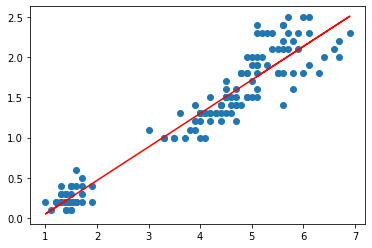

In [50]:
X = data[["petal_length"]]
y = data[["petal_width"]]

lm = LinearRegression()

lm.fit(X, y)

r_squared = lm.score(X, y)
print("R^2: ", r_squared)

y_pred = lm.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, 'r')
plt.show()

In [35]:
lm.score()

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

In [36]:
y

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64